<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 5</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 30. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Michel Vielmetter</font>

**Matrikelnummer**: <font color="red">5920493</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Lorenz-Attraktor</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>

#### Teil A

Für die Simulation eines einfachen **Wetter-Modells** hat der Meteorologe Edward Lorenz 1963 eine Beschreibung von 
Luftströmungen entworfen. Dazu hat er ein Gleichungssystem von drei gekoppelten Differentialgleichungen betrachtet:
\begin{align}
\dot{X} &= a\left(Y - X\right) \\
\dot{Y} &= X\left(b-Z\right)-Y\\
\dot{Z} &= X Y - c Z.
\end{align}  
Berechnen Sie mittels des **Runge-Kutta-Verfahrens 4. Ordnung** eine Lösung für $X(t)$, $Y(t)$ und $Z(t)$ und stellen sie diese für $t \in [0, 100]$ dar.

Wählen Sie dabei eine Schrittweite von $\Delta t = 0.01$ und verwenden Sie die folgenden Parameter und Startwerte:
\begin{align*}
 &a=10,\; b=28,\; c=8/3, \\
 &X(0)=0,\; Y(0)=1,\; Z(0)=1.05.
\end{align*} 

Zur Visualisierung können Sie Schnitte in der $xy$, $xz$ und $yz$-Ebene wählen.

Wie sich erst im Laufe der nächsten Dekaden herausstellen sollte, hat Edward Lorenz mit diesem einfachen Modell einen ganz neuen Forschungszweig gestartet - die sogenannte **Chaos-Forschung**. Lorenz selbst war sich der weitreichenden Implikationen seiner Beobachtung, dass die zeitliche Entwicklung eines relativ einfachen *deterministischen* Systems höchst empfindlich auf nur leicht veränderte Startbedingungen reagiert, voll bewusst und prägte schon früh den Begriff des **Schmetterlings-Effekts**. Wer sich zu diesen historischen Entwicklungen weiter informieren möchte, der sei auf diesen [Artikel](http://arxiv.org/pdf/1306.5777.pdf) zum 50-jährigen Jubiläum der Entdeckung des Lorenz-Attraktors hingewiesen.

#### Teil B

In diesem [Paper](http://www.sciencedirect.com/science/article/pii/037596019390735I) beschreiben die Autoren mathematisch motitiviert, wie sich die Form des Lorenz-Attraktors verändern lässt. Dabei stößt man beispielsweise auf den folgenden Satz an Gleichungen:

\begin{align}
\dot{X} &= \frac{1}{2}\left(-a X^3 + (2a + b - Z)X^2 Y + (a - 2) X Y^2 - (b - Z)Y^3\right) (X^2 + Y^2) \\
\dot{Y} &= \frac{1}{2}\left( (b - Z) X^3 + (a - 2) X^2 Y + (-2a - b + Z)X Y^2 - a Y^3\right) (X^2 + Y^2) \\
\dot{Z} &= 2 X^3 Y - 2 X Y^3 - c Z \\
\end{align}  

Wenden Sie auch auf diese Gleichungen das Runge-Kutta-Verfahren an und stellen Sie das Ergebnis wie zuvor dar. Die Parameter und Randbedingungen sind die Gleichen wie in Teil A.

In [11]:
function lorenz1(t, r)
    (x, y, z) = r
    
    [
        a * (y - x);
        x * (b - z) - y;
        x * y - c * z
    ]
end

function lorenz2(t, r)
    (X, Y, Z) = r
    [
        1/2 * (-a * X^3 + (2 * a + b - Z) * X^2 * Y + (a - 2) * X * Y^2 - (b - Z) * Y^3) * (X^2 + Y^2);
        1/2 * ((b - Z) * X^3 + (a - 2) * X^2 * Y + (-2 * a - b + Z) * X * Y^2 - a * Y^3) * (X^2 + Y^2);
        2 * X^3 * Y - 2 * X * Y^3 - c * Z
    ]
end;

In [2]:
using PyPlot
function timePlot(T, r)
    x = map(x->x[1],r)
    y = map(y->y[2],r)
    z = map(z->z[3],r)
    
    plot3D(x,y,z)
    
    for (i,j) in enumerate(T)
        
    end
end;

In [5]:
using ODE

const a = 10
const b = 28
const c = 8/3

const dt = .01
const tEnd = 100

r0 = [0.;1.;1.05];

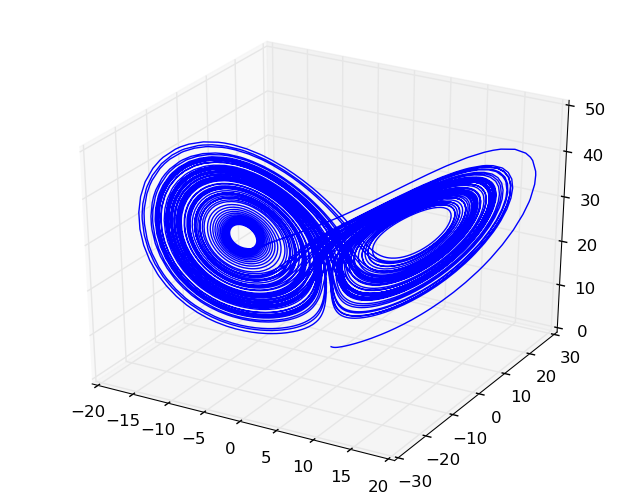

In [12]:
(T, r) = ode45(lorenz1,r0,0:dt:tEnd)
timePlot(T, r);

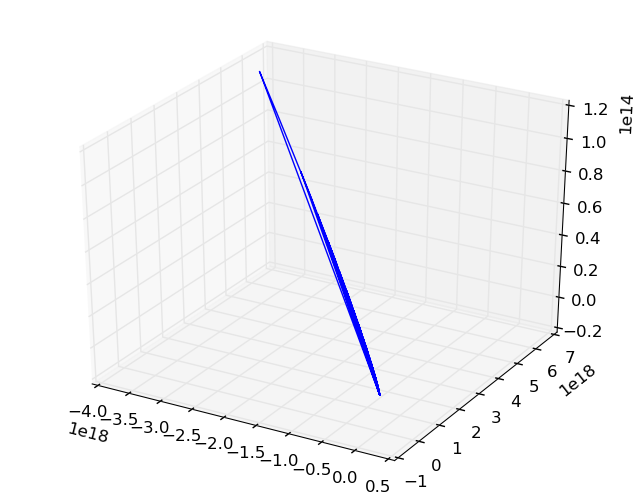

In [15]:
(T, r) = ode45(lorenz2,r0,0:dt:tEnd)
timePlot(T, r);

In [14]:
lorenz2(0,r0)

3-element Array{Float64,1}:
 -13.475
  -5.0  
  -2.8  